# Exploratory Data Analysis (EDA)
### Self‑Explanatory | Student‑Ready | Interview‑Grade

This notebook is designed so that **students can understand EDA**.

Key idea:
> **Machine Learning models learn patterns, not correctness.  
EDA ensures patterns are realistic, logical, and meaningful.**


## Why Do We Perform EDA?

EDA is performed before feature engineering and modeling to answer one question:

**Can this data be trusted?**

If bad data enters a model:
- Accuracy may look good
- Real‑world predictions will fail
- Business decisions will be wrong


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set(style="whitegrid")

## Reading the Dataset



In [14]:
import numpy as np
import pandas as pd

data = pd.read_csv("customer_purchase_data.csv")


## 1️⃣ Univariate Analysis

Univariate analysis studies **one feature at a time**.

### Why?
If you don’t understand individual features,
all relationships built later become unreliable.


In [15]:
data.describe()

,Age,Income,Experience,SpendingScore,CreditScore
count,100.000000,100.000000,100.0000,100.000000,100.000000
mean,37.910000,12.250000,20.7300,52.380000,599.490000
std,12.219454,6.493781,11.6036,24.174776,170.928273
min,18.000000,3.000000,0.0000,11.000000,311.000000
25%,26.750000,7.000000,10.7500,32.000000,465.000000
50%,38.000000,11.500000,21.0000,55.000000,584.000000
75%,46.250000,17.250000,32.0000,69.000000,744.500000
max,59.000000,24.000000,39.0000,99.000000,895.000000


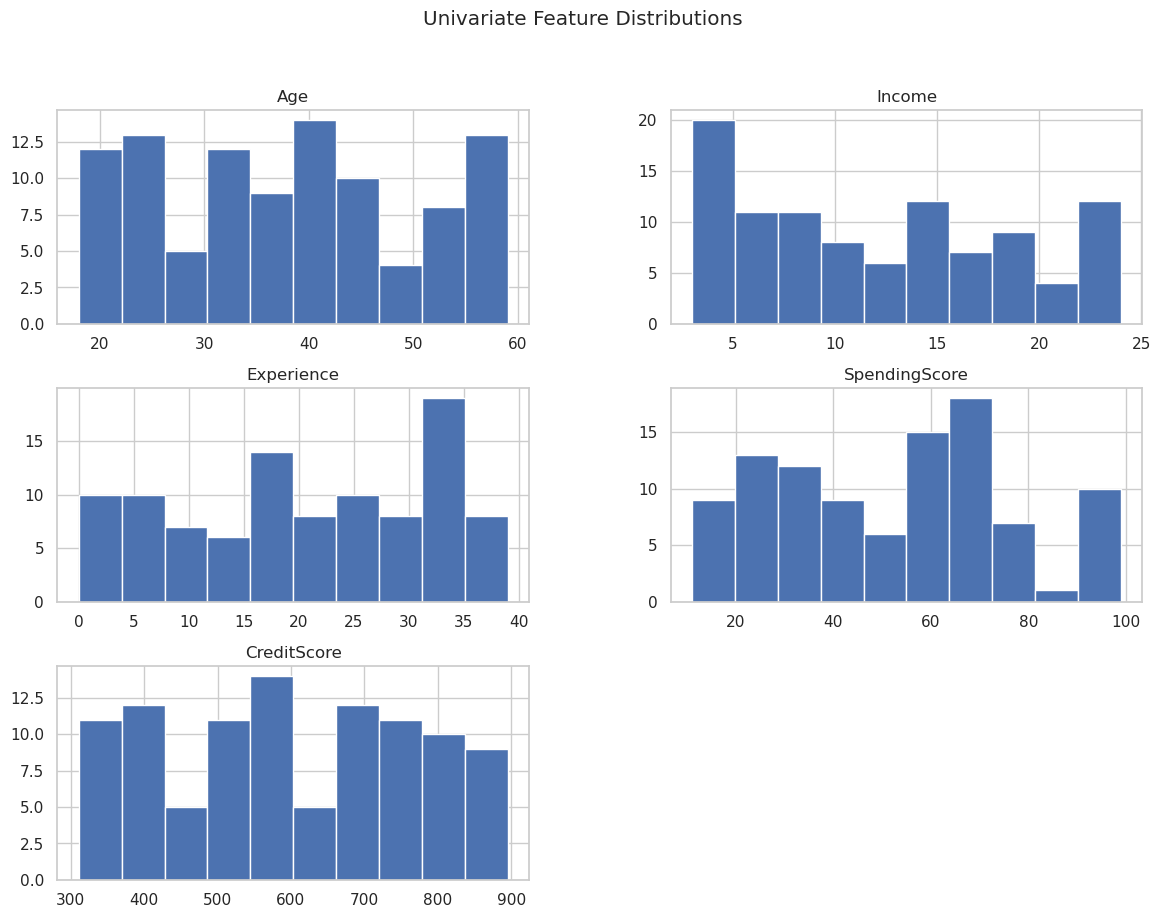

In [16]:
data.hist(figsize=(14,10))
plt.suptitle("Univariate Feature Distributions")
plt.show()

## 2️⃣ Bivariate Analysis

Bivariate analysis checks whether relationships between features
match **real‑world logic**.


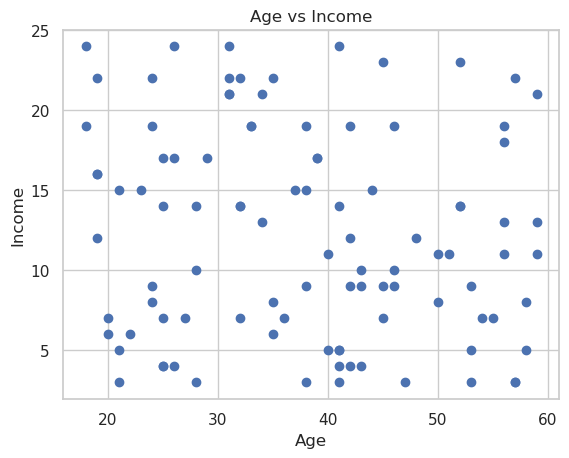

In [17]:
plt.scatter(data["Age"], data["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.show()

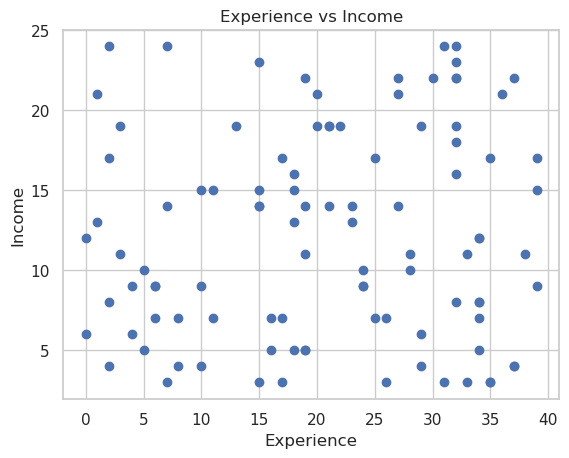

In [18]:
plt.scatter(data["Experience"], data["Income"])
plt.xlabel("Experience")
plt.ylabel("Income")
plt.title("Experience vs Income")
plt.show()

### Why Check: Experience > Age?

Experience = years worked  
Age = years lived  

If **Experience > Age**, it is **impossible in real life**.

Models cannot detect this mistake — humans must.


In [19]:
data[data["Experience"] > data["Age"]]

,Age,Income,Experience,SpendingScore,CreditScore,Purchased
14,20,7,25,27,734,No
20,19,16,32,33,393,No
21,38,9,39,41,752,No
31,20,6,29,18,322,No
40,31,21,36,22,635,No
41,26,24,31,69,557,Yes
43,19,12,34,66,459,No
49,31,22,32,25,876,No
53,21,3,35,24,855,No
54,19,22,37,75,584,Yes


## 3️⃣ Feature–Target Relationships

This step identifies which features **actually influence the target**.


In [20]:
data["Purchased"].value_counts(normalize=True)

Purchased
No     0.85
Yes    0.15
Name: proportion, dtype: float64

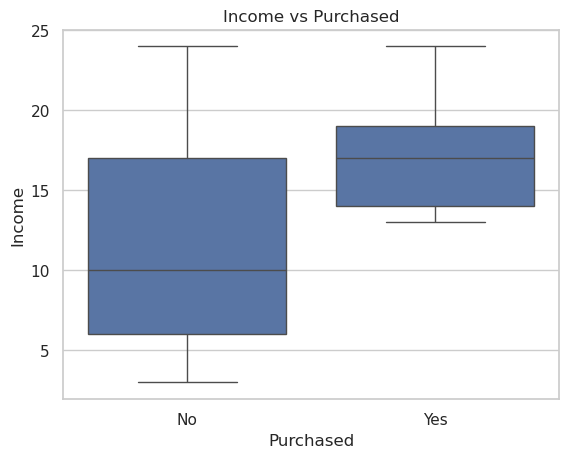

In [21]:
sns.boxplot(x="Purchased", y="Income", data=data)
plt.title("Income vs Purchased")
plt.show()

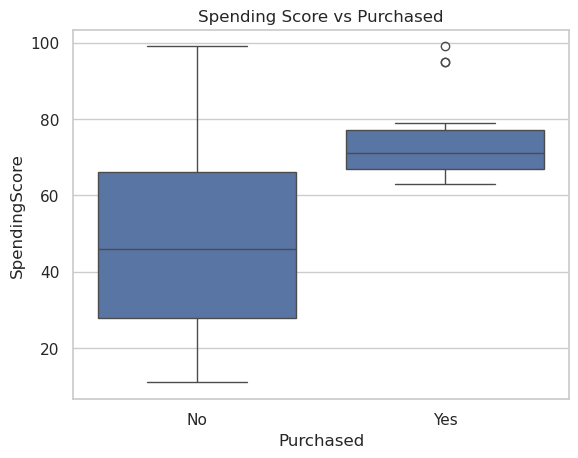

In [22]:
sns.boxplot(x="Purchased", y="SpendingScore", data=data)
plt.title("Spending Score vs Purchased")
plt.show()

## 4️⃣ Correlation Analysis

Highly correlated features carry duplicate information
and can destabilize models.


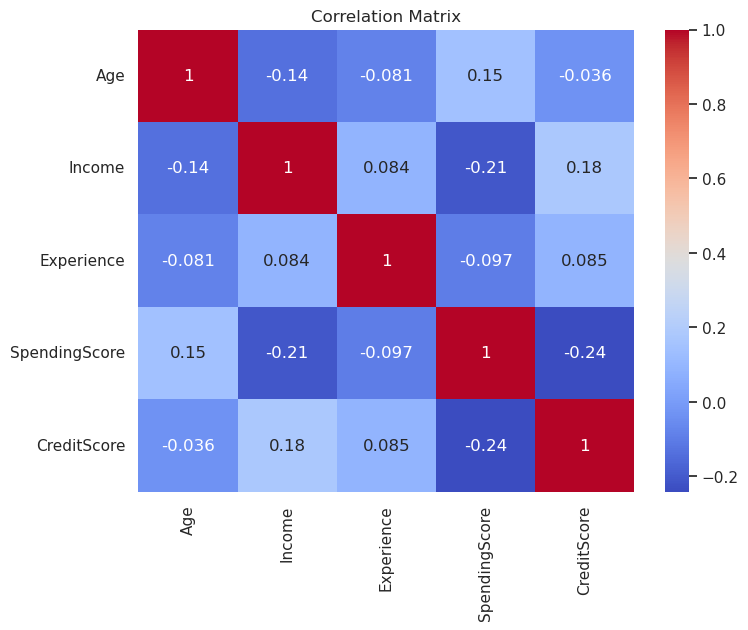

In [23]:
corr = data.drop("Purchased", axis=1).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 5️⃣ Multicollinearity (VIF)

VIF measures how much a feature depends on all others combined.
High VIF = unstable model.


In [24]:
X = data.drop("Purchased", axis=1)

vif = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif

,Feature,VIF
0,Age,8.296802
1,Income,4.409337
2,Experience,3.940087
3,SpendingScore,4.836185
4,CreditScore,9.406245


## Final Takeaway

EDA is **data validation**, not visualization.

Always ensure:
- Data follows real‑world logic
- Relationships make business sense
- Features are stable and interpretable

Only then should modeling begin.
